<a href="https://colab.research.google.com/github/alexzhangaz48/INFO_6105_machine_learning/blob/main/Ver_2_1_INFO_6105_midterm_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
#Import the training dataset csv file
from google.colab import files
uploaded = files.upload()

Saving training_dataset-1.csv to training_dataset-1.csv


In [ ]:
df = pd.read_csv('training_dataset-1.csv')

# Overview of the Data

1. Summary of Data

In [ ]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,1.761400e+04,1.761400e+04,17614.000000,17614.000000,17614.000000,1.761400e+04,17614.000000,17614.000000,17614.000000,17614.000000,17614.000000,17614.000000,17614.000000,17614.000000,17614.000000,17614.000000,17614.000000,17614.000000,17614.000000,17614.000000
mean,4.569068e+09,5.408514e+05,3.372431,2.113475,2080.915692,1.513310e+04,1.495856,0.007097,0.233848,3.409844,7.660100,1789.456398,291.459294,1970.917566,80.774384,98078.043204,47.560487,-122.214127,1985.633303,12680.009424
std,2.869570e+09,3.685506e+05,0.935641,0.773550,923.863759,4.194362e+04,0.540092,0.083944,0.765230,0.649949,1.179174,831.418845,443.419741,29.425821,393.288442,53.473239,0.138408,0.140161,685.581487,26713.761385
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,659.000000
25%,2.122052e+09,3.225000e+05,3.000000,1.500000,1420.000000,5.053250e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471600,-122.328000,1480.000000,5100.000000
50%,3.904985e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.607000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.572700,-122.230000,1840.000000,7600.000000
75%,7.300200e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.065000e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10057.250000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [ ]:
df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

2. Visualization of the Data


In [ ]:
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

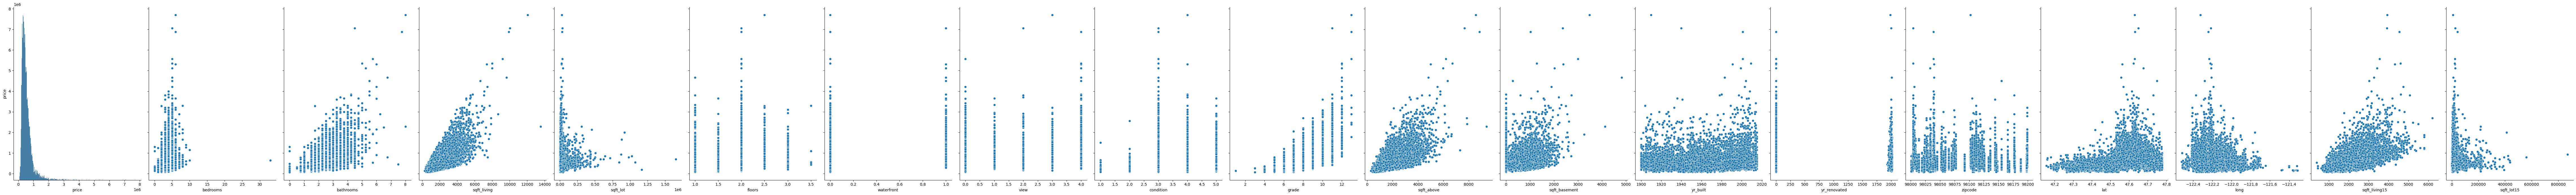

In [ ]:
sns.pairplot(df, x_vars=[ 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'], y_vars='price',size=7, aspect=0.7)

# Preprocessing and data cleaning

1. Encoding Date: only care about which month is each house sold

In [ ]:
import datetime
import time

In [ ]:
#change date column to date format
df['date'] = pd.to_datetime(df['date'])
#extract month from date column to a new month column
df['month_sold']=df['date'].dt.month

In [ ]:
#delete id and date features
df.drop(['id','date',],axis=1,inplace=True)

2. Encoding position:There is no linear relationship between housing price and the longtitude and latitude. The most expensive area in Seattle is around the center of downtown. The far the place is away from the center, the less expensive the housing price tends to be. So instead of directly using "lat" and "long", the "lat_diff" and "long_diff" are implied in the model. "zipcode" feature is removed because it contains similar information.

In [ ]:
# Most expensive point in Seattle: 47.615717, -122.350628
df['lat_diff']=abs(df['lat']-47.615717)
df['long_diff']=abs(df['long']-(-122.350628))

In [ ]:
df.drop(['lat','long',],axis=1,inplace=True)

In [ ]:
df.columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'sqft_living15',
       'sqft_lot15', 'month_sold', 'lat_diff', 'long_diff'],
      dtype='object')

2. Since the "zipcode", "lat", and "long" features are all related to position information, we are removing "zipcode" feature from our model. Then the data is seperated into X (predictors) and y (outputs)

In [ ]:
X = df[[ 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'sqft_living15',
       'sqft_lot15', 'month_sold', 'lat_diff', 'long_diff']]

In [ ]:
y = df['price']

3. Log transformation is implied to reduce MSE due to high variance of prices.

In [ ]:
y = np.log(y)

4. Build the model with all features to see the p-values. Features with p-value higher than 0.05 will be removed

In [ ]:
import statsmodels.api as sm
from scipy import stats

In [ ]:
X = sm.add_constant(X)
model_all = sm.OLS(y,X)
res_all = model_all.fit()

In [ ]:
print(res_all.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.803
Model:                            OLS   Adj. R-squared:                  0.803
Method:                 Least Squares   F-statistic:                     4217.
Date:                Sat, 04 Nov 2023   Prob (F-statistic):               0.00
Time:                        23:34:07   Log-Likelihood:                 601.95
No. Observations:               17614   AIC:                            -1168.
Df Residuals:                   17596   BIC:                            -1028.
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const            14.6522      0.184     79.836

  We need to remove features with a p-value larger than 0.05. We don't need to remove anything in our case.

In [ ]:
# X.drop(['sqft_lot15',],axis=1,inplace=True)

4. Seperate the data into training and testing sets

In [ ]:
"""
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

X_train.head()
"""

'\nfrom sklearn.model_selection import train_test_split\nX_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)\n\nX_train.head()\n'

# Linear Regression

1. Function of Building a linear regression model

In [ ]:
import statsmodels.api as sm
from scipy import stats

In [ ]:
def processSubset(feature_set):
    # Fit model on feature_set and calculate RSS
    model = sm.OLS(y,X[list(feature_set)])
    regr = model.fit()
    RSS = ((regr.predict(X[list(feature_set)]) - y) ** 2).sum()
    return {"model":regr, "RSS":RSS}

2. Forward Stepwise Selection

In [ ]:
import time

In [ ]:
def forward(predictors):
    # Pull out predictors we still need to process
    remaining_predictors = [p for p in X.columns if p not in predictors]
    tic = time.time()
    results = []

    for p in remaining_predictors:
        results.append(processSubset(predictors+[p]))
    # Wrap everything up in a nice dataframe
    models = pd.DataFrame(results)
    # Choose the model with the highest RSS
    best_model = models.loc[models['RSS'].argmin()]
    toc = time.time()
    print("Processed ", models.shape[0], "models on", len(predictors)+1, "predictors in", (toc-tic), "seconds.")
    # Return the best model, along with some other useful information about the model
    return best_model

In [ ]:
from sklearn.utils.discovery import all_displays
models_fwd = pd.DataFrame(columns=["RSS", "model"])
X = sm.add_constant(X,prepend=True, has_constant='skip')
predictors = []
all_params = [[]]*len(X.columns)

for i in range(1,len(X.columns)+1):
    models_fwd.loc[i] = forward(predictors)
    predictors = models_fwd.loc[i]["model"].model.exog_names
    all_params[i-1] = predictors

Processed  19 models on 1 predictors in 0.08571434020996094 seconds.
Processed  18 models on 2 predictors in 0.0958857536315918 seconds.
Processed  17 models on 3 predictors in 0.13115882873535156 seconds.
Processed  16 models on 4 predictors in 0.11982178688049316 seconds.
Processed  15 models on 5 predictors in 0.13906502723693848 seconds.
Processed  14 models on 6 predictors in 0.1271190643310547 seconds.
Processed  13 models on 7 predictors in 0.13209080696105957 seconds.
Processed  12 models on 8 predictors in 0.12870526313781738 seconds.
Processed  11 models on 9 predictors in 0.1420438289642334 seconds.
Processed  10 models on 10 predictors in 0.13279271125793457 seconds.
Processed  9 models on 11 predictors in 0.15076613426208496 seconds.
Processed  8 models on 12 predictors in 0.1185312271118164 seconds.
Processed  7 models on 13 predictors in 0.11524248123168945 seconds.
Processed  6 models on 14 predictors in 0.09911179542541504 seconds.
Processed  5 models on 15 predictors 

In [ ]:
print(models_fwd.loc[16,"model"].summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.803
Model:                            OLS   Adj. R-squared:                  0.803
Method:                 Least Squares   F-statistic:                     4777.
Date:                Sat, 04 Nov 2023   Prob (F-statistic):               0.00
Time:                        23:34:22   Log-Likelihood:                 597.05
No. Observations:               17614   AIC:                            -1162.
Df Residuals:                   17598   BIC:                            -1038.
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const            14.6201      0.183     79.977

In [ ]:
models_fwd.shape

(19, 2)

# Cross Validation

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression

Here we are using 5-fold cross-validation to decide which features to keep

In [ ]:
lm = LinearRegression()

In [ ]:
mse_list = [[]]*len(all_params)
mse_mean = []
mse_std = []
for ii in range(len(all_params)):
  current_sub_section = X[all_params[ii]]
  mse = cross_val_score(lm, current_sub_section, y, cv=5, scoring='neg_mean_squared_error')
  mse_list[ii] = -mse
  mse_mean.append(-mse.mean())
  mse_std.append(mse.std())
  print("The MSE of",ii+1,"variables is:")
  print("MSE:", -mse)
  print(-mse.mean())
  print(mse.std())

The MSE of 1 variables is:
MSE: [0.27684834 0.27468797 0.27221886 0.28617449 0.27768265]
0.27752246460169394
0.004722290961209888
The MSE of 2 variables is:
MSE: [0.13952932 0.1372431  0.13601049 0.14003296 0.14164404]
0.1388919837733059
0.0020151263089095216
The MSE of 3 variables is:
MSE: [0.08881541 0.08752217 0.08789528 0.0881723  0.08449404]
0.08737984017055063
0.0015035067065692158
The MSE of 4 variables is:
MSE: [0.06833895 0.06686061 0.06890258 0.06814013 0.06689412]
0.06782727743710704
0.0008150092136803602
The MSE of 5 variables is:
MSE: [0.06370208 0.06192167 0.06602418 0.06355543 0.0615102 ]
0.06334271316001391
0.0015963782612382457
The MSE of 6 variables is:
MSE: [0.06139961 0.05877754 0.06370406 0.06016701 0.05864429]
0.06053850102433474
0.0018755973053422674
The MSE of 7 variables is:
MSE: [0.06020342 0.05770988 0.06176547 0.05916205 0.0571024 ]
0.05918864606107334
0.0016858019383086949
The MSE of 8 variables is:
MSE: [0.05928839 0.05688257 0.06066496 0.05829463 0.056308

In [ ]:
best_model_index = pd.Series(mse_mean).idxmin()
print("The best model includes the following features:")
print(all_params[best_model_index])

The best model includes the following features:
['const', 'grade', 'lat_diff', 'sqft_living', 'view', 'yr_built', 'condition', 'sqft_living15', 'waterfront', 'bathrooms', 'sqft_lot', 'long_diff', 'yr_renovated', 'sqft_above', 'month_sold', 'floors', 'bedrooms']


In [ ]:
best_model_params = all_params[best_model_index]
best_model_params.remove('const')

In [ ]:
len(best_model_params)

16

Rebuild the model

In [ ]:
X = df[all_params[best_model_index]]

In [ ]:
# X= sm.add_constant(X,prepend=True, has_constant='skip')

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [ ]:
print(X_train.shape)
print(X_test.shape)

(14091, 16)
(3523, 16)


In [ ]:
linreg = LinearRegression(fit_intercept=True)

In [ ]:
linreg.fit(X_train, y_train)

LinearRegression()

In [ ]:
print(linreg.intercept_)
print(X_train.columns)
print(linreg.coef_)

14.724344487294562
Index(['grade', 'lat_diff', 'sqft_living', 'view', 'yr_built', 'condition',
       'sqft_living15', 'waterfront', 'bathrooms', 'sqft_lot', 'long_diff',
       'yr_renovated', 'sqft_above', 'month_sold', 'floors', 'bedrooms'],
      dtype='object')
[ 1.35072117e-01 -2.50908534e+00  1.37942538e-04  5.23124872e-02
 -1.65946558e-03  7.23006095e-02  9.73597785e-05  3.78871166e-01
  4.91908912e-02  6.68236422e-07 -2.09740164e-01  4.85635505e-05
  2.24786819e-05 -4.67138184e-03  2.51451298e-02 -5.65294242e-03]


In [ ]:
X_test.head()

,grade,lat_diff,sqft_living,view,yr_built,condition,sqft_living15,waterfront,bathrooms,sqft_lot,long_diff,yr_renovated,sqft_above,month_sold,floors,bedrooms
6549,5,0.129917,880,0,1924,4,980,0,1.00,5375,0.148628,0,880,7,1.0,3
8048,7,0.266417,1810,0,2003,3,1810,0,2.50,5669,0.297628,0,1810,9,2.0,0
16673,9,0.264417,2620,0,1989,4,3010,0,2.50,14096,0.250628,0,2620,9,2.0,3
9881,7,0.021083,1530,1,1916,4,1280,0,1.75,3503,0.020372,0,830,7,1.0,2
11584,9,0.067583,2600,0,1951,4,2380,0,2.50,4750,0.049372,0,1700,5,1.0,3


In [ ]:
y_test.head()

6549     12.452933
8048     12.388394
16673    13.017003
9881     13.171154
11584    13.579788
Name: price, dtype: float64

In [ ]:
y_test_predict = linreg.predict(X_test)

In [ ]:
y_test_predict = pd.DataFrame(y_test_predict, columns = ['price'])

y_test_predict.head()

,price
0,12.403802
1,12.433551
2,13.049550
3,13.198551
4,13.551213


In [ ]:
from math import sqrt
from sklearn.metrics import mean_squared_error

In [ ]:
loss_test = mean_squared_error(y_test, y_test_predict)

In [ ]:
loss_test

0.05429169849224063

# Prediction for the Unknown Price

In [ ]:
#Import the test dataset csv file
from google.colab import files
uploaded = files.upload()

Saving test_dataset-1.csv to test_dataset-1.csv


In [ ]:
df_pred = pd.read_csv('test_dataset-1.csv')

In [ ]:
df_pred.columns

Index(['id', 'date', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [ ]:
import datetime
import time

In [ ]:
#change date column to date format
df_pred['date'] = pd.to_datetime(df_pred['date'])
#extract month from date column to a new month column
df_pred['month_sold']=df_pred['date'].dt.month

In [ ]:
# Most expensive point in Seattle: 47.615717, -122.350628
df_pred['lat_diff']=abs(df_pred['lat']-47.615717)
df_pred['long_diff']=abs(df_pred['long']-(-122.350628))

In [ ]:
X_train.columns

Index(['grade', 'lat_diff', 'sqft_living', 'view', 'yr_built', 'condition',
       'sqft_living15', 'waterfront', 'bathrooms', 'sqft_lot', 'long_diff',
       'yr_renovated', 'sqft_above', 'month_sold', 'floors', 'bedrooms'],
      dtype='object')

In [ ]:
X_pred = df_pred[X_train.columns]

In [ ]:
X_pred.describe()

,grade,lat_diff,sqft_living,view,yr_built,condition,sqft_living15,waterfront,bathrooms,sqft_lot,long_diff,yr_renovated,sqft_above,month_sold,floors,bedrooms
count,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000,3999.00000,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000
mean,7.642661,0.120250,2075.424856,0.236309,1971.390848,3.407602,1990.60115,0.009502,2.120405,14991.852213,0.147752,100.381595,1783.696674,6.598400,1.487497,3.363841
std,1.158992,0.090789,894.263460,0.771180,29.141966,0.654306,684.62396,0.097028,0.755135,39037.889544,0.133438,436.416510,813.356912,3.124522,0.539550,0.905159
min,4.000000,0.000117,370.000000,0.000000,1900.000000,1.000000,720.00000,0.000000,0.000000,676.000000,0.000372,0.000000,370.000000,1.000000,1.000000,0.000000
25%,7.000000,0.055583,1430.000000,0.000000,1951.000000,3.000000,1497.50000,0.000000,1.750000,5001.000000,0.036000,0.000000,1200.000000,4.000000,1.000000,3.000000
50%,7.000000,0.093317,1930.000000,0.000000,1975.000000,3.000000,1850.00000,0.000000,2.250000,7651.000000,0.119628,0.000000,1560.000000,6.000000,1.000000,3.000000
75%,8.000000,0.157033,2540.000000,0.000000,1997.000000,4.000000,2370.00000,0.000000,2.500000,10800.000000,0.227128,0.000000,2210.000000,9.000000,2.000000,4.000000
max,13.000000,0.439317,8020.000000,4.000000,2015.000000,5.000000,6110.00000,1.000000,6.500000,982998.000000,1.031628,2015.000000,8020.000000,12.000000,3.500000,11.000000


In [ ]:
y_pred = linreg.predict(X_pred)

In [ ]:
y_pred_result = np.exp(y_pred)


In [ ]:
y_pred_result = pd.DataFrame(y_pred_result, columns = ['price'])
y_pred_result = np.round(y_pred_result, decimals=2)
y_pred_result.describe().apply(lambda s: s.apply('{0:.5f}'.format))

,price
count,3999.00000
mean,522807.42635
std,327853.79546
min,119752.62000
25%,337730.34500
50%,439782.86000
75%,597501.79000
max,5240965.91000


In [ ]:
# Assuming 'id' column is present in df_pred
y_pred_result['id'] = df_pred['id']
y_pred_result = y_pred_result[['id', 'price']]

# Round the 'price' column
y_pred_result = y_pred_result.round({'price': 2})

# Export the DataFrame to a CSV file
y_pred_result.to_csv('pred_y_data.csv', index=False)

# Download the CSV file
files.download('pred_y_data.csv')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
y_pred_result.describe()

,id,price
count,3.999000e+03,3.999000e+03
mean,4.629782e+09,5.228074e+05
std,2.907023e+09,3.278538e+05
min,1.000102e+06,1.197526e+05
25%,2.141250e+09,3.377303e+05
50%,3.886903e+09,4.397829e+05
75%,7.483950e+09,5.975018e+05
max,9.842300e+09,5.240966e+06


In [ ]:
from google.colab import files


y_pred_result.to_csv('pred_y_data.csv')
files.download('pred_y_data.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>